In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.optimize import newton
from math import factorial
from math import sqrt

In [2]:
%pprint

Pretty printing has been turned OFF


# Problem 1 (1.17)

## 1 (a)

In [3]:
T = [1,9,6,4,7,9,5,8,4,10,6,12,6,8,9,5,7,8,8,7]
print(T)

[1, 9, 6, 4, 7, 9, 5, 8, 4, 10, 6, 12, 6, 8, 9, 5, 7, 8, 8, 7]


In [4]:
S = [3,7,9,9,10,4,8,5,5,3,6,3,5,4,9,9,8,6,8,3]
print(S)

[3, 7, 9, 9, 10, 4, 8, 5, 5, 3, 6, 3, 5, 4, 9, 9, 8, 6, 8, 3]


In [5]:
A = [0] + list(np.cumsum(T)[:-1])
print(A)

[0, 1, 10, 16, 20, 27, 36, 41, 49, 53, 63, 69, 81, 87, 95, 104, 109, 116, 124, 132]


In [6]:
U = [0 for i in range(len(A))]
print(U)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
D = U.copy()
print(D)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
for i in range(len(A)):
    D[i] = U[i] + S[i]
    if i < len(A)-1:
        U[i+1] = max(D[i], A[i+1])
print(U)

[0, 3, 10, 19, 28, 38, 42, 50, 55, 60, 63, 69, 81, 87, 95, 104, 113, 121, 127, 135]


In [9]:
print(D)

[3, 10, 19, 28, 38, 42, 50, 55, 60, 63, 69, 72, 86, 91, 104, 113, 121, 127, 135, 138]


In [10]:
W_q = [u-a for u,a in zip(U,A)]
print(W_q)

[0, 2, 0, 3, 8, 11, 6, 9, 6, 7, 0, 0, 0, 0, 0, 0, 4, 5, 3, 3]


In [11]:
W = [w+s for w,s in zip(W_q,S)]
print(W)

[3, 9, 9, 12, 18, 15, 14, 14, 11, 10, 6, 3, 5, 4, 9, 9, 12, 11, 11, 6]


In [12]:
W_ave = sum(W)/len(W)
print(W_ave)

9.55


In [13]:
W_q_ave = sum(W_q)/len(W_q)
print(W_q_ave)

3.35


In [14]:
S_ave = sum(S)/len(S)
print(S_ave)

6.2


## 1 (b)

In [15]:
rate = len(D)/D[-1]
print(len(D), D[-1], rate)

20 138 0.14492753623188406


In [16]:
L_q = rate*W_q_ave
print(L_q)

0.48550724637681164


In [17]:
L = rate*W_ave
print(L)

1.384057971014493


In [18]:
W_q_ave_wait = sum(W_q)/sum([w>0 for w in W_q])
print(W_q_ave_wait)

5.583333333333333


In [19]:
print(sum(S), D[-1], sum(S)/D[-1], 1-sum(S)/D[-1])

124 138 0.8985507246376812 0.10144927536231885


In [20]:
print(A)
print(U)

[0, 1, 10, 16, 20, 27, 36, 41, 49, 53, 63, 69, 81, 87, 95, 104, 109, 116, 124, 132]
[0, 3, 10, 19, 28, 38, 42, 50, 55, 60, 63, 69, 81, 87, 95, 104, 113, 121, 127, 135]


In [21]:
Ti = list(set(A+U))
Ti.sort()
print(Ti)

[0, 1, 3, 10, 16, 19, 20, 27, 28, 36, 38, 41, 42, 49, 50, 53, 55, 60, 63, 69, 81, 87, 95, 104, 109, 113, 116, 121, 124, 127, 132, 135]


In [22]:
N_q=[sum([a <= t for a in A])-sum([u <= t for u in U]) for t in Ti]
print(N_q)

[0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [23]:
N=[sum([a <= t for a in A])-sum([d <= t for d in D]) for t in Ti]
print(N)

[1, 2, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1]


In [24]:
max(N_q)

2

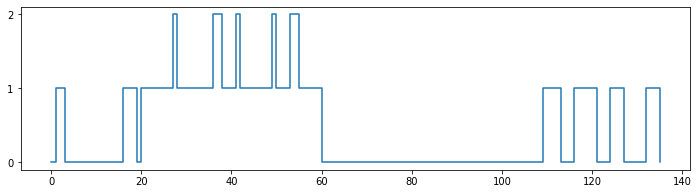

In [25]:
plt.figure(figsize=[12,3])
plt.plot(Ti,N_q,drawstyle='steps-post')
plt.yticks(range(max(N_q)+1))
plt.show()

In [26]:
sum([n*t for n,t in zip(N_q,np.diff(Ti))])/D[-1]

0.4855072463768116

In [27]:
L_q

0.48550724637681164

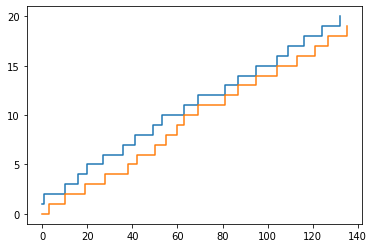

In [28]:
plt.plot(A,[i for i in range(1,len(A)+1)],drawstyle='steps-post')
plt.plot(U,range(len(U)),drawstyle='steps-post')
#plt.plot(D,range(len(D)),drawstyle='steps-post')
#plt.plot(Ti,N,drawstyle='steps-post')
#plt.plot(Ti,N_q,drawstyle='steps-post')
plt.yticks(list(set([i*(i%5==0) for i in range(len(A)+1)])))
plt.show()

In [29]:
print(sum(S), sum(W_q), sum(W))

124 67 191


In [30]:
print(sum(S)/20, sum(W_q)/20, sum(W)/20)

6.2 3.35 9.55


In [31]:
df = pd.DataFrame(dict(Customer=[i for i in range(1,21)],T=T,S=S,A=A,U=U,D=D,W_q=W_q,W=W))
print(df.to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
 Customer &   T &   S &    A &    U &    D &  W\_q &   W \\
\midrule
        1 &   1 &   3 &    0 &    0 &    3 &    0 &   3 \\
        2 &   9 &   7 &    1 &    3 &   10 &    2 &   9 \\
        3 &   6 &   9 &   10 &   10 &   19 &    0 &   9 \\
        4 &   4 &   9 &   16 &   19 &   28 &    3 &  12 \\
        5 &   7 &  10 &   20 &   28 &   38 &    8 &  18 \\
        6 &   9 &   4 &   27 &   38 &   42 &   11 &  15 \\
        7 &   5 &   8 &   36 &   42 &   50 &    6 &  14 \\
        8 &   8 &   5 &   41 &   50 &   55 &    9 &  14 \\
        9 &   4 &   5 &   49 &   55 &   60 &    6 &  11 \\
       10 &  10 &   3 &   53 &   60 &   63 &    7 &  10 \\
       11 &   6 &   6 &   63 &   63 &   69 &    0 &   6 \\
       12 &  12 &   3 &   69 &   69 &   72 &    0 &   3 \\
       13 &   6 &   5 &   81 &   81 &   86 &    0 &   5 \\
       14 &   8 &   4 &   87 &   87 &   91 &    0 &   4 \\
       15 &   9 &   9 &   95 &   95 &  104 &    0 &   9 \\
       16 &

# Problem 2 (1.18)

In [32]:
A = [5*i for i in range(1,60//5+1)]
print(A)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


In [33]:
D = [7, 17, 23, 29, 35, 38, 39, 44, 46, 60]
print(D)

[7, 17, 23, 29, 35, 38, 39, 44, 46, 60]


In [34]:
Ti = list(set(A+D))
Ti.sort()
Ti = [0] + Ti
print(Ti)

[0, 5, 7, 10, 15, 17, 20, 23, 25, 29, 30, 35, 38, 39, 40, 44, 45, 46, 50, 55, 60]


In [35]:
N=[sum([a <= t for a in A])-sum([d <= t for d in D]) for t in Ti]
print(N)

[0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2]


In [36]:
L = sum([n*t for n,t in zip(N[:-1],np.diff(Ti))])/D[-1]
print(list(np.diff(Ti)))
print(sum([n*t for n,t in zip(N[:-1],np.diff(Ti))]))
print(D[-1])
print(L)

[5, 2, 3, 5, 2, 3, 3, 2, 4, 1, 5, 3, 1, 1, 4, 1, 1, 4, 5, 5]
68
60
1.1333333333333333


In [37]:
W_i = sum([n*t for n,t in zip([n==0 for n in N],np.diff(Ti))])/D[-1]
print([n*t for n,t in zip([n==0 for n in N],np.diff(Ti))])
print(list(np.diff(Ti)))
print(sum([n*t for n,t in zip([n==0 for n in N],np.diff(Ti))]))
print(W_i)

[5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 4, 0, 0]
[5, 2, 3, 5, 2, 3, 3, 2, 4, 1, 5, 3, 1, 1, 4, 1, 1, 4, 5, 5]
14
0.23333333333333334


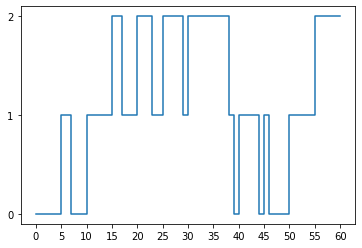

In [38]:
plt.plot(Ti,N,drawstyle='steps-post')
plt.yticks(range(max(N)+1))
plt.xticks(list(set([i*(i%5==0) for i in range(max(Ti)+1)])))
plt.show()

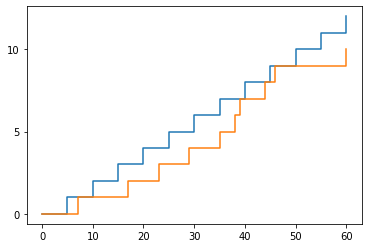

In [39]:
plt.plot([0]+A,range(len(A)+1),drawstyle='steps-post')
plt.plot([0]+D,range(len(D)+1),drawstyle='steps-post')
#plt.plot([0]+D,range(len(D)+1),drawstyle='steps-post')
#plt.plot(Ti,N,drawstyle='steps-post')
#plt.plot(Ti,N_q,drawstyle='steps-post')
plt.yticks(list(set([i*(i%5==0) for i in range(len(A)+1)])))
plt.show()

# Problem 3 (1.19)

In [40]:
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
print(A)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [41]:
S = [2.22,1.76,2.13,0.14,0.76,0.70,0.47,0.22,0.18,2.41,0.41,0.46,1.37,0.27,0.27]
print(S)

[2.22, 1.76, 2.13, 0.14, 0.76, 0.7, 0.47, 0.22, 0.18, 2.41, 0.41, 0.46, 1.37, 0.27, 0.27]


In [42]:
D = [0 for i in range(len(A))]
U = D.copy()
U[0] = A[0]
for i in range(len(A)):
    D[i] = U[i] + S[i]
    if i < len(A)-1:
        U[i+1] = max(D[i], A[i+1])
print(U)
print(D)

[1, 3.22, 4.98, 7.11, 7.25, 8.01, 8.709999999999999, 9.18, 9.4, 10, 12.41, 12.82, 13.280000000000001, 14.650000000000002, 15]
[3.22, 4.98, 7.11, 7.25, 8.01, 8.709999999999999, 9.18, 9.4, 9.58, 12.41, 12.82, 13.280000000000001, 14.650000000000002, 14.920000000000002, 15.27]


In [43]:
Ti = list(set(A+U))
Ti.sort()
print(Ti)

[1, 2, 3, 3.22, 4, 4.98, 5, 6, 7, 7.11, 7.25, 8, 8.01, 8.709999999999999, 9, 9.18, 9.4, 10, 11, 12, 12.41, 12.82, 13, 13.280000000000001, 14, 14.650000000000002, 15]


In [44]:
N_q=[sum([a <= t for a in A])-sum([u <= t for u in U]) for t in Ti]
print(N_q)

[0, 1, 2, 1, 2, 1, 2, 3, 4, 3, 2, 3, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0]


In [45]:
L_q = sum([n*t for n,t in zip(N_q,np.diff(Ti))])/D[-1]
print([round(t,4) for t in np.diff(Ti)])
print(sum([n*t for n,t in zip(N_q,np.diff(Ti))]))
print(L_q)

[1.0, 1.0, 0.22, 0.78, 0.98, 0.02, 1.0, 1.0, 0.11, 0.14, 0.75, 0.01, 0.7, 0.29, 0.18, 0.22, 0.6, 1.0, 1.0, 0.41, 0.41, 0.18, 0.28, 0.72, 0.65, 0.35]
17.020000000000007
1.1146037982973154


In [46]:
N_q_A = [N_q[i+1]-1 if N_q[i+1]>N_q[i] else 0 for i in range(len(N_q[:-1]))]
print(N_q_A)

[0, 1, 0, 1, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [47]:
L_q_A = sum(N_q_A)/sum([n>0 for n in N_q_A])
print(sum(N_q_A))
print(sum([n>0 for n in N_q_A]))
print(L_q_A)

12
8
1.5


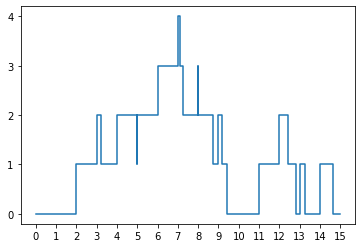

In [48]:
plt.plot([0]+Ti,[0]+N_q,drawstyle='steps-post')
plt.yticks(range(max(N_q)+1))
plt.xticks(range(16))
plt.show()

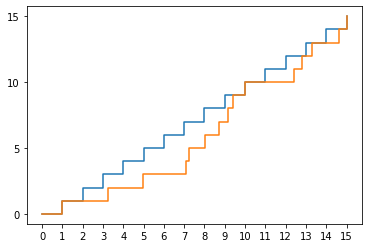

In [49]:
plt.plot([0]+A,range(len(A)+1),drawstyle='steps-post')
plt.plot([0]+U,range(len(U)+1),drawstyle='steps-post')
#plt.plot([0]+D,range(len(D)+1),drawstyle='steps-post')
#plt.plot(Ti,N,drawstyle='steps-post')
#plt.plot(Ti,N_q,drawstyle='steps-post')
plt.yticks(list(set([i*(i%5==0) for i in range(len(A)+1)])))
plt.xticks(range(16))
plt.show()

In [50]:
df = pd.DataFrame(dict(A=A,S=S,U=U,D=D))
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
  A &     S &      U &      D \\
\midrule
  1 &  2.22 &   1.00 &   3.22 \\
  2 &  1.76 &   3.22 &   4.98 \\
  3 &  2.13 &   4.98 &   7.11 \\
  4 &  0.14 &   7.11 &   7.25 \\
  5 &  0.76 &   7.25 &   8.01 \\
  6 &  0.70 &   8.01 &   8.71 \\
  7 &  0.47 &   8.71 &   9.18 \\
  8 &  0.22 &   9.18 &   9.40 \\
  9 &  0.18 &   9.40 &   9.58 \\
 10 &  2.41 &  10.00 &  12.41 \\
 11 &  0.41 &  12.41 &  12.82 \\
 12 &  0.46 &  12.82 &  13.28 \\
 13 &  1.37 &  13.28 &  14.65 \\
 14 &  0.27 &  14.65 &  14.92 \\
 15 &  0.27 &  15.00 &  15.27 \\
\bottomrule
\end{tabular}



# Problem 4

## 4 (a)

In [51]:
A=[0,6,9,10,15,17,19,23,29,35]
S=[6,4,6,1,2,1,3,5,8,6]

In [52]:
D = [0 for i in range(len(A))]
U = D.copy()
U[0] = A[0]
for i in range(len(A)):
    D[i] = U[i] + S[i]
    if i < len(A)-1:
        U[i+1] = max(D[i], A[i+1])
print(U)
print(D)

[0, 6, 10, 16, 17, 19, 20, 23, 29, 37]
[6, 10, 16, 17, 19, 20, 23, 28, 37, 43]


In [53]:
D_4a = D[-1]
print(D_4a)

43


In [54]:
Ti = list(set(A+U))
Ti.sort()
print(Ti)

[0, 6, 9, 10, 15, 16, 17, 19, 20, 23, 29, 35, 37]


In [55]:
N_q=[sum([a <= t for a in A])-sum([u <= t for u in U]) for t in Ti]
print(N_q)

[0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 0]


In [56]:
W_q = [u-a for u,a in zip(U,A)]
W_q_ave = sum(W_q)/len(W_q)
print(W_q)
print(W_q_ave)

[0, 0, 1, 6, 2, 2, 1, 0, 0, 2]
1.4


In [57]:
L_q = sum([n*t for n,t in zip(N_q,np.diff(Ti))])/D_4a
print(L_q)

0.32558139534883723


In [58]:
df = pd.DataFrame(dict(A=A,S=S,U=U,D=D,W_q=W_q))
print(df.to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
  A &  S &   U &   D &  W\_q \\
\midrule
  0 &  6 &   0 &   6 &    0 \\
  6 &  4 &   6 &  10 &    0 \\
  9 &  6 &  10 &  16 &    1 \\
 10 &  1 &  16 &  17 &    6 \\
 15 &  2 &  17 &  19 &    2 \\
 17 &  1 &  19 &  20 &    2 \\
 19 &  3 &  20 &  23 &    1 \\
 23 &  5 &  23 &  28 &    0 \\
 29 &  8 &  29 &  37 &    0 \\
 35 &  6 &  37 &  43 &    2 \\
\bottomrule
\end{tabular}



In [59]:
W_q_ave = sum(W_q)/len(W_q)
print(W_q_ave)

1.4


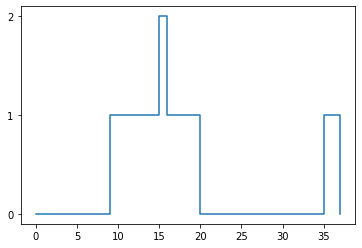

In [60]:
plt.plot([0]+Ti,[0]+N_q,drawstyle='steps-post')
plt.yticks(range(max(N_q)+1))
plt.xticks(list(set([i*(i%5==0) for i in range(max(Ti)+1)])))
plt.show()

## 4 (b)

In [61]:
A=[0,6,9,10,15,17,19,23,29,35]
S=[6,4,6,1,2,1,3,5,8,6] # From 4 (a)
S=[2*s for s in S]

In [62]:
D = [0 for i in range(len(A))]
U = D.copy()
U[0] = A[0]
U[1] = A[1]
D[0] = U[0] + S[0]
for i in range(1, len(A)):
    D[i] = U[i] + S[i]
    if i < len(A)-1:
        U[i+1] = max(min(max(D), max(D[:D.index(max(D))]+D[D.index(max(D))+1:])), A[i+1])
print(U)
print(D)

[0, 6, 12, 14, 16, 20, 22, 24, 29, 35]
[12, 14, 24, 16, 20, 22, 28, 34, 45, 47]


In [63]:
Ti = list(set(A+U))
Ti.sort()
print(Ti)

[0, 6, 9, 10, 12, 14, 15, 16, 17, 19, 20, 22, 23, 24, 29, 35]


In [64]:
N_q=[sum([a <= t for a in A])-sum([u <= t for u in U]) for t in Ti]
print(N_q)

[0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0]


In [65]:
L_q = sum([n*t for n,t in zip(N_q,np.diff(Ti))])/D_4a
print(L_q)

0.3488372093023256


In [66]:
W_q = [u-a for u,a in zip(U,A)]
print(W_q)

[0, 0, 3, 4, 1, 3, 3, 1, 0, 0]


In [67]:
df = pd.DataFrame(dict(A=A,S=S,U=U,D=D,W_q=W_q))
print(df.to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
  A &   S &   U &   D &  W\_q \\
\midrule
  0 &  12 &   0 &  12 &    0 \\
  6 &   8 &   6 &  14 &    0 \\
  9 &  12 &  12 &  24 &    3 \\
 10 &   2 &  14 &  16 &    4 \\
 15 &   4 &  16 &  20 &    1 \\
 17 &   2 &  20 &  22 &    3 \\
 19 &   6 &  22 &  28 &    3 \\
 23 &  10 &  24 &  34 &    1 \\
 29 &  16 &  29 &  45 &    0 \\
 35 &  12 &  35 &  47 &    0 \\
\bottomrule
\end{tabular}



In [68]:
W_q_ave = sum(W_q)/len(W_q)
print(W_q_ave)

1.5


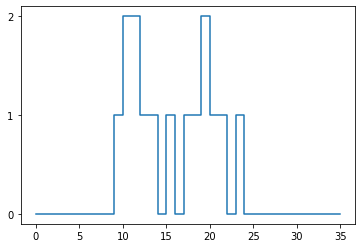

In [69]:
plt.plot([0]+Ti,[0]+N_q,drawstyle='steps-post')
plt.yticks(range(max(N_q)+1))
plt.xticks(list(set([i*(i%5==0) for i in range(max(Ti)+1)])))
plt.show()

# Problem 5

In [70]:
arr_frac = 0.5
dep_frac = 1 - arr_frac
arr_hold_mean = 1
dep_hold_mean = 1.5
rate_hr = 50
rate = rate_hr/60
service_mean = arr_frac * arr_hold_mean + dep_frac * dep_hold_mean
rho = rate*service_mean
print(rate, service_mean)

0.8333333333333334 1.25


In [71]:
num_ops = 400
N = 10000

In [72]:
def sim(arr_frac, arr_hold_mean, dep_hold_mean, rate_hr, num_ops, exp_service = True):
    rate = rate_hr/60
    T = np.random.exponential(1/rate,num_ops)
    op_type = np.random.binomial(1, arr_frac, num_ops)
    if exp_service:
        S = [np.random.exponential(arr_hold_mean) if b==1 
            else np.random.exponential(dep_hold_mean) for b in op_type]
    else:
        S = [arr_hold_mean if b==1 else dep_hold_mean for b in op_type]
    A = [0] + list(np.cumsum(T[:-1]))
    D = [0 for i in range(len(A))]
    D[0] = S[0] + A[0]
    for i in range(1,len(A)):
        D[i] = S[i] + max(D[i-1], A[i])
    W_q_n = [d-s-a for d,s,a in zip(D,S,A)]
    return sum(W_q_n)/num_ops

In [73]:
rates = [i*5 for i in range(1,11)]

In [74]:
data = [[sim(arr_frac, arr_hold_mean, dep_hold_mean, r, num_ops, False) for i in range(N)] for r in rates]

In [75]:
df = pd.DataFrame(data)
df = df.transpose()
df = df.rename(columns=dict(zip([i for i in range(10)],rates)))

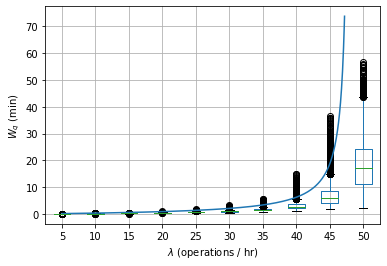

In [76]:
plt.figure()
df.boxplot()
x = np.arange(1, 9.45, 0.01)
y = [i*5*service_mean/60/(1/service_mean-i*5/60) for i in x]
plt.plot(x,y)
#plt.title('Average queue-waiting time')
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.ylabel(r'$W_q$'+' (min)')
plt.savefig('W_q1.pdf')
plt.show()

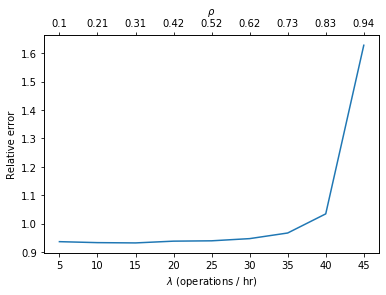

In [77]:
m = [rate*service_mean/60/(1/service_mean-rate/60) for rate in rates][:-1]
d = np.array(df.mean())[:-1]
rho = np.array(rates)*service_mean/60
err = abs((d-m)/d)
#plt.title('Relative error by arrival rate')
plt.ylabel('Relative error')
plt.plot(rates[:-1],err)
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.twiny()
plt.xlabel(r'$\rho$')
plt.plot(rates[:-1],err, alpha=0)
plt.gca().set_xticklabels([0]+[round(r,2) for r in rho][:-1])
plt.savefig('er1.pdf')
plt.show()

In [78]:
arr_frac = 0.25
dep_frac = 1 - arr_frac
arr_hold_mean = 1
dep_hold_mean = 1.5
rate_hr = 50
rate = rate_hr/60
service_mean = arr_frac * arr_hold_mean + dep_frac * dep_hold_mean
rho = rate*service_mean
print(rate, service_mean)

0.8333333333333334 1.375


In [79]:
data = [[sim(arr_frac, arr_hold_mean, dep_hold_mean, r, num_ops, False) for i in range(N)] for r in rates]

In [80]:
df = pd.DataFrame(data)
df = df.transpose()
df = df.rename(columns=dict(zip([i for i in range(10)],rates)))

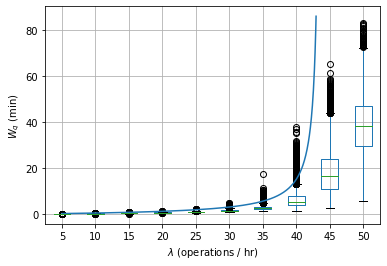

In [81]:
df.boxplot()
x = np.arange(1, 8.6, 0.01)
y = [i*5*service_mean/60/(1/service_mean-i*5/60) for i in x]
plt.plot(x,y)
#plt.title('Average queue-waiting time')
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.ylabel(r'$W_q$'+' (min)')
plt.savefig('W_q2.pdf')
plt.show()

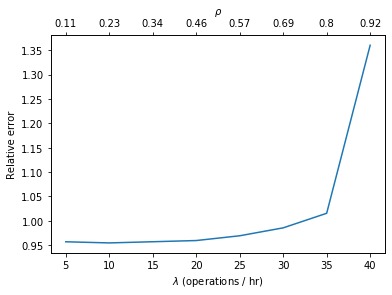

In [82]:
m = [rate*service_mean/60/(1/service_mean-rate/60) for rate in rates][:-2]
d = np.array(df.mean())[:-2]
rho = np.array(rates)*service_mean/60
err = abs((d-m)/d)
#plt.title('Relative error by arrival rate')
plt.ylabel('Relative error')
plt.plot(rates[:-2],err)
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.twiny()
plt.xlabel(r'$\rho$')
plt.plot(rates[:-2],err, alpha=0)
plt.gca().set_xticklabels([0]+[round(r,2) for r in rho])
plt.savefig('er2.pdf')
plt.show()

In [83]:
arr_frac = 0.5
dep_frac = 1 - arr_frac
arr_hold_mean = 1
dep_hold_mean = 1.5
rate_hr = 50
rate = rate_hr/60
service_mean = arr_frac * arr_hold_mean + dep_frac * dep_hold_mean
rho = rate*service_mean
print(rate, service_mean)

0.8333333333333334 1.25


In [84]:
num_ops = 400
N = 1000

In [85]:
def sim(arr_frac, arr_hold_mean, dep_hold_mean, rate_hr, num_ops, exp_service = True):
    rate = rate_hr/60
    T = np.random.exponential(1/rate,num_ops)
    op_type = np.random.binomial(1, arr_frac, num_ops)
    if exp_service:
        S = [np.random.exponential(arr_hold_mean) if b==1 
            else np.random.exponential(dep_hold_mean) for b in op_type]
    else:
        S = [arr_hold_mean if b==1 else dep_hold_mean for b in op_type]
    A = [0] + list(np.cumsum(T[:-1]))
    D = [0 for i in range(len(A))]
    D[0] = S[0] + A[0]
    for i in range(1,len(A)):
        D[i] = S[i] + max(D[i-1], A[i])
    W_q_n = [d-s-a for d,s,a in zip(D,S,A)]
    return sum(W_q_n)/num_ops

In [86]:
rates = [i*5 for i in range(1,11)]

In [87]:
data = [[sim(arr_frac, arr_hold_mean, dep_hold_mean, r, num_ops, True) for i in range(N)] for r in rates]

In [88]:
df = pd.DataFrame(data)
df = df.transpose()
df = df.rename(columns=dict(zip([i for i in range(10)],rates)))

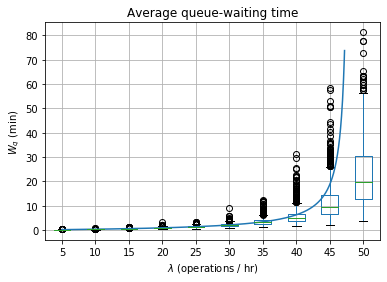

In [89]:
plt.figure()
df.boxplot()
x = np.arange(1, 9.45, 0.01)
y = [i*5*service_mean/60/(1/service_mean-i*5/60) for i in x]
plt.plot(x,y)
plt.title('Average queue-waiting time')
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.ylabel(r'$W_q$'+' (min)')
plt.show()

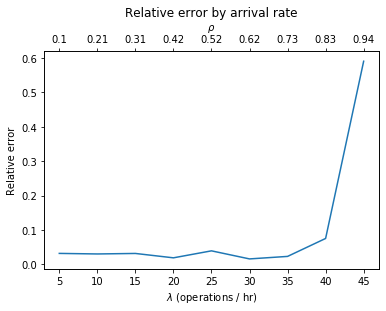

In [90]:
m = [rate*service_mean/60/(1/service_mean-rate/60) for rate in rates][:-1]
d = np.array(df.mean())[:-1]
rho = np.array(rates)*service_mean/60
err = abs((d-m)/d)
plt.title('Relative error by arrival rate')
plt.ylabel('Relative error')
plt.plot(rates[:-1],err)
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.twiny()
plt.xlabel(r'$\rho$')
plt.plot(rates[:-1],err, alpha=0)
plt.gca().set_xticklabels([0]+[round(r,2) for r in rho][:-1])
plt.show()

In [91]:
arr_frac = 0.25
dep_frac = 1 - arr_frac
arr_hold_mean = 1
dep_hold_mean = 1.5
rate_hr = 50
rate = rate_hr/60
service_mean = arr_frac * arr_hold_mean + dep_frac * dep_hold_mean
rho = rate*service_mean
print(rate, service_mean)

0.8333333333333334 1.375


In [92]:
data = [[sim(arr_frac, arr_hold_mean, dep_hold_mean, r, num_ops, True) for i in range(N)] for r in rates]

In [93]:
df = pd.DataFrame(data)
df = df.transpose()
df = df.rename(columns=dict(zip([i for i in range(10)],rates)))

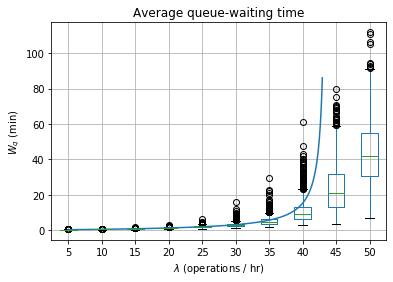

In [94]:
df.boxplot()
x = np.arange(1, 8.6, 0.01)
y = [i*5*service_mean/60/(1/service_mean-i*5/60) for i in x]
plt.plot(x,y)
plt.title('Average queue-waiting time')
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.ylabel(r'$W_q$'+' (min)')
plt.show()

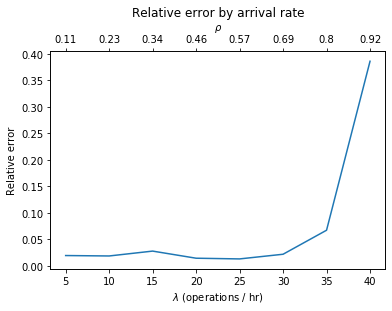

In [95]:
m = [rate*service_mean/60/(1/service_mean-rate/60) for rate in rates][:-2]
d = np.array(df.mean())[:-2]
rho = np.array(rates)*service_mean/60
err = abs((d-m)/d)
plt.title('Relative error by arrival rate')
plt.ylabel('Relative error')
plt.plot(rates[:-2],err)
plt.xlabel(r'$\lambda$'+' (operations / hr)')
plt.twiny()
plt.xlabel(r'$\rho$')
plt.plot(rates[:-2],err, alpha=0)
plt.gca().set_xticklabels([0]+[round(r,2) for r in rho])
plt.show()

In [96]:
arr_frac = 0.5
dep_frac = 1 - arr_frac
arr_hold_mean = 1
dep_hold_mean = 1.5
rate_hr = 50
rate = rate_hr/60
service_mean = arr_frac * arr_hold_mean + dep_frac * dep_hold_mean
rho = rate*service_mean
print(rate, service_mean)

0.8333333333333334 1.25


In [97]:
T = np.random.exponential(1/rate,num_ops)
np.mean(T)

1.214784888142926

In [98]:
op_type = np.random.binomial(1, arr_frac, num_ops)
np.mean(op_type)

0.4825

In [99]:
S = [arr_hold_mean if b==1 else dep_hold_mean for b in op_type]
np.mean(S)

1.25875

In [100]:
#S = [np.random.exponential(arr_hold_mean) 
#             if b==1 
#             else np.random.exponential(dep_hold_mean) for b in op_type]
#np.mean(S)

In [101]:
A = [0] + list(np.cumsum(T[:-1]))

In [102]:
D = [0 for i in range(len(A))]
D[0] = S[0] + A[0]
for i in range(1,len(A)):
    D[i] = S[i] + max(D[i-1], A[i])

In [103]:
D[-1]

511.50722211258096

In [104]:
W_q_n = [d-s-a for d,s,a in zip(D,S,A)]

In [105]:
W_q = sum(W_q_n)/D[-1]
print(W_q)

9.410942957600405


In [106]:
[i in range(len(W_q_n))]

[True]

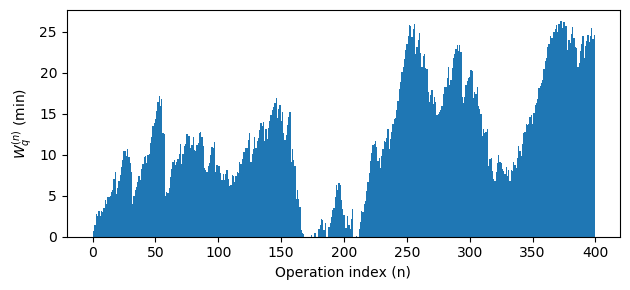

In [107]:
plt.figure(figsize=(6.4,3),dpi=100)
plt.bar([i for i in range(len(W_q_n))],W_q_n,1)
#plt.title('Sample queue-waiting times')
plt.ylabel(r'$W_q^{(n)}$'+' (min)')
plt.xlabel('Operation index (n)')
plt.tight_layout()
#plt.savefig('path.pdf')
plt.show()

# Problem 6

In [108]:
c = 3

lam = 45/60
mu = 1/3
print(lam, mu)

0.75 0.3333333333333333


In [109]:
r = lam / mu
print(r)

2.25


In [110]:
rho = r / c
print(rho)

0.75


In [111]:
n = r**c
d = factorial(c)*(1-rho)
s = sum([r**i/factorial(i) for i in range(c)])
p_0 = 1 / (n/d + s)
print(p_0)

0.07476635514018691


In [112]:
L_q = n*rho/(d *(1-rho))*p_0
print(L_q)

1.703271028037383


In [113]:
W = (1/mu) + L_q/lam
print(W)

5.271028037383177


# Problem 7

In [114]:
c = 5
lam = 75/60
mu = 1/2
print(lam, mu)

1.25 0.5


In [115]:
r = lam / mu
print(r)

2.5


In [116]:
rho = r / c
print(rho)

0.5


## 7 (b)

In [117]:
n = r**c
d = factorial(c)*(1-rho)
s = sum([r**i/factorial(i) for i in range(c)])
p_0 = 1 / (n/d + s)
print(p_0)

0.08010012515644557


In [118]:
p_n = sum([lam**i/factorial(i)/mu**i*p_0 for i in range(4)])
print(p_n)

0.7392574050896956


## 7 (c)

In [119]:
L_q = n*rho/(d *(1-rho))*p_0
print(L_q)

0.1303712974551523


# Problem 8

In [120]:
lam = 18
mu = 20
print(lam, mu)

18 20


In [121]:
r = lam / mu
print(r)

0.9


## 8 (a)

In [122]:
c = 1
rho = r / c
print(rho)

0.9


In [123]:
n = r**c
d = factorial(c)*(1-rho)
s = sum([r**i/factorial(i) for i in range(c)])
p_0 = 1 / (n/d + s)
print(p_0)

0.09999999999999998


In [124]:
L_q = n*rho/(d *(1-rho))*p_0
print(L_q)

8.100000000000003


In [125]:
L_q = rho**2/(1-rho)
print(L_q)

8.100000000000003


In [126]:
r * 40 + (c - r) * 10 + L_q * 2

53.2

## 8 (b)

In [127]:
c = 2
rho = r / c
print(rho)

0.45


In [128]:
n = r**c
d = factorial(c)*(1-rho)
s = sum([r**i/factorial(i) for i in range(c)])
p_0 = 1 / (n/d + s)
print(p_0)

0.37931034482758624


In [129]:
L_q = n*rho/(d *(1-rho))*p_0
print(L_q)

0.22852664576802512


In [130]:
r * 40 + (c - r) * 10 + L_q * 2

47.45705329153605

# Problem 9 (3.32)

In [131]:
def approx(alpha, beta):
    return norm.pdf(beta)/(norm.pdf(beta) + beta * norm.cdf(beta)) - alpha

## 9 (a)

In [132]:
lam = 500 / 60
mu = 1 / 2
print(lam, mu)

8.333333333333334 0.5


In [133]:
r = lam / mu
print(r)

16.666666666666668


In [134]:
beta = newton(lambda beta: approx(0.10, beta), 1)
print(beta)

1.4201868881004411


In [135]:
c_approx = r + beta * sqrt(r)
print(c_approx)

22.464555358728653


## 9 (b)

In [136]:
lam = 500 / 60 * 1.6
mu = 1 / 2
print(lam, mu)

13.333333333333336 0.5


In [137]:
r = lam / mu
print(r)

26.66666666666667


In [138]:
c_approx = r + beta * sqrt(r)
print(c_approx)

34.00048022148687


## 9 (c)

In [139]:
lam = 500 / 60
mu = 1 / 3
print(lam, mu)

8.333333333333334 0.3333333333333333


In [140]:
r = lam / mu
print(r)

25.000000000000004


In [141]:
c_approx = r + beta * sqrt(r)
print(c_approx)

32.10093444050221


## 9 (d)

In [142]:
lam = 500 / 60
mu = 1 / 2
print(lam, mu)

8.333333333333334 0.5


In [143]:
r = lam / mu
print(r)

16.666666666666668


In [144]:
c = 24
rho = r / c
print(rho)

0.6944444444444445


In [145]:
n = r**c
d = factorial(c)*(1-rho)
s = sum([r**i/factorial(i) for i in range(c)])
p_0 = 1 / (n/d + s)
print(p_0)

5.714528177635283e-08


In [146]:
C_c_r = n*p_0/d
print(C_c_r)

0.06361426515341066


In [147]:
L_q = n*rho/(d*(1-rho))*p_0
print(L_q)

0.14457787534866065


In [148]:
W_q = L_q / lam
print(W_q)

0.017349345041839277


In [149]:
lam = 500 / 60 * 1.6
mu = 1 / 2
print(lam, mu)

13.333333333333336 0.5


In [150]:
r = lam / mu
print(r)

26.66666666666667


In [151]:
c = 35
rho = r / c
print(rho)

0.7619047619047621


In [152]:
n = r**c
d = factorial(c)*(1-rho)
s = sum([r**i/factorial(i) for i in range(c)])
p_0 = 1 / (n/d + s)
print(p_0)

2.5787312412854715e-12


In [153]:
C_c_r = n*p_0/d
print(C_c_r)

0.08498227504737443


In [154]:
L_q = n*rho/(d *(1-rho))*p_0
print(L_q)

0.2719432801515984


In [155]:
W_q = L_q / lam
print(W_q)

0.020395746011369877


# Problem 10 (3.37)

In [156]:
beta = newton(lambda beta: approx(0.05, beta), 1)
print(beta)

1.7398362717905036


## 10 (a)

In [157]:
lam = 300 / 60
mu = 1 / 2
print(lam, mu)

5.0 0.5


In [158]:
r = lam / mu
print(r)

10.0


In [159]:
c_approx = r + beta * sqrt(r)
print(c_approx)

15.50184537463375


## 10 (b)

In [160]:
lam = 300 / 60 * 2
mu = 1 / 2
print(lam, mu)

10.0 0.5


In [161]:
r = lam / mu
print(r)

20.0


In [162]:
c_approx = r + beta * sqrt(r)
print(c_approx)

27.780784346886733


In [169]:
c = 4
lam = 5/6
mu = 1/3
print(lam, mu)

0.8333333333333334 0.3333333333333333


In [170]:
r = lam / mu
print(r)

2.5000000000000004


In [171]:
rho = r / c
print(rho)

0.6250000000000001


## 7 (b)

In [173]:
n = r**c
d = factorial(c)*(1-rho)
s = sum([r**i/factorial(i) for i in range(c)])
p_0 = 1 / (n/d + s)
print(p_0)

0.07369498464687815


In [178]:
p_n = sum([lam**i/factorial(i)/mu**i*p_0 for i in range(5)])
print(p_n)

0.8000895598771749


In [179]:
1-p_n

0.1999104401228251

## 7 (c)

In [175]:
L_q = n*rho/(d *(1-rho))*p_0
print(L_q)

0.5330945069942005
